# Análise dos casos de óbito de Covid-19 em Indaiatuba

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as wb
from scipy.stats import norm

# 1. Extração dos dados 
Fonte: G1 - Campinas

https://g1.globo.com/sp/campinas-regiao/noticia/2020/06/28/coronavirus-prefeituras-da-regiao-de-campinas-confirmam-novos-casos-neste-domingo-28-de-junho.ghtml

In [2]:
base = pd.read_excel("CovidIndaiatuba.xlsx")

In [3]:
base.tail()

,Obitos,Data,Sexo,Idade,anos,Comorbidade
55,56,2020-06-24,Homem,54,"anos,","Sem Comorbidade, ex-tabagista."
56,57,2020-06-24,Homem,65,"anos,",Com Comorbidades
57,51,2020-06-25,Homem,59,"anos,",Sem Comorbidade.
58,52,2020-06-26,Homem,53,"anos,",Com Comorbidades
59,53,2020-06-27,Homem,74,"anos,",Com Comorbidades


# 2. Criação das colunas: MesMorte, diferençaDias e MédiaMovel - concatenação 

In [4]:
base.groupby(base['Data'].dt.month)['Obitos'].sum()
base['MesMorte'] = base['Data'].dt.month
base['diferencaDias'] = base['Data'] - base['Data'].min()
base['MédiaMovel'] = base['Obitos'].rolling(2).mean()
base

,Obitos,Data,Sexo,Idade,anos,Comorbidade,MesMorte,diferencaDias,MédiaMovel
0,1,2020-03-31,Homem,64,"anos,",Com Comorbidades,3,0 days,NaN
1,2,2020-04-13,Mulher,50,"anos,",Com Comborbidades,4,13 days,1.5
2,3,2020-04-18,Mulher,52,"anos,",Sem Comorbidade,4,18 days,2.5
3,4,2020-04-21,Homem,64,"anos,",Com Comorbidades,4,21 days,3.5
4,5,2020-04-24,Mulher,61,"anos,",Com Comorbidades,4,24 days,4.5
5,6,2020-05-02,Mulher,83,"anos,",Com Comorbidades,5,32 days,5.5
6,7,2020-05-06,Homem,38,"anos,",Com Comorbidades,5,36 days,6.5
7,8,2020-05-06,Homem,76,"anos,",Com Comorbidades,5,36 days,7.5
8,9,2020-05-07,Homem,30,"anos,",Com Comorbidades,5,37 days,8.5
9,10,2020-05-07,Homem,55,"anos,","Sem Comorbidade, ex-tabagista.",5,37 days,9.5


# 3. Cálculo por Sexo

In [5]:
pd.crosstab(base['Sexo'],base['Sexo'])

Sexo,Homem,Mulher
Sexo,,
Homem,37,0
Mulher,0,23


In [6]:
print ('Sexo em %')
Afetados = base['Sexo'].value_counts(normalize=True)
print (str(round(Afetados, 4) *100)) 

Sexo em %
Homem     61.67
Mulher    38.33
Name: Sexo, dtype: float64


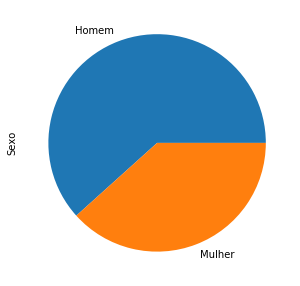

In [7]:
base['Sexo'].value_counts().plot(kind = "pie", figsize = (5,5))

# 4. Agrupando os dados pelo mês do óbito

In [8]:
df = base.groupby(base['Data'].dt.month)['Obitos'].count()
df

Data
3     1
4     4
5    22
6    33
Name: Obitos, dtype: int64

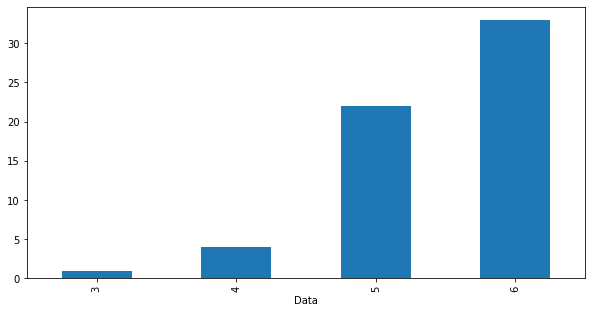

In [9]:
df.plot(kind = "bar", figsize = (10,5))

# 5. Calculando o total de dias desde a primeira morte

In [10]:
a = base['diferencaDias'] = base['Data'] - base['Data'].min()
a.tail()

55   85 days
56   85 days
57   86 days
58   87 days
59   88 days
Name: Data, dtype: timedelta64[ns]

# 6. Verifando se com coborbidades ou sem comorbidades

In [11]:
pd.crosstab(base['Comorbidade'],base['Comorbidade'])

Comorbidade,Com Comborbidades,Com Comorbidades,Sem Comorbidade,"Sem Comorbidade, ex-tabagista.",Sem Comorbidade.
Comorbidade,,,,,
Com Comborbidades,1,0,0,0,0
Com Comorbidades,0,44,0,0,0
Sem Comorbidade,0,0,7,0,0
"Sem Comorbidade, ex-tabagista.",0,0,0,2,0
Sem Comorbidade.,0,0,0,0,6


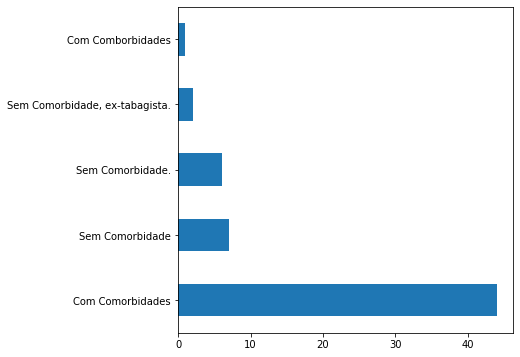

In [12]:
base['Comorbidade'].value_counts().head().plot(kind = "barh", figsize = (6,6))

# 7. Gráfico com exibição dos Óbitos no tempo

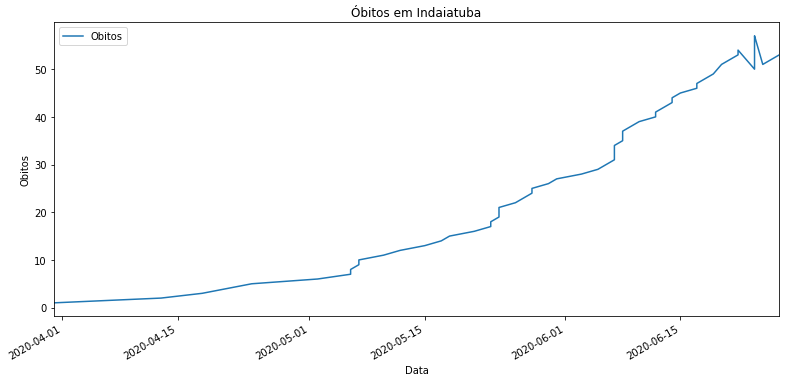

In [13]:
base.plot(x='Data', y='Obitos', figsize=(13,6));
plt.title('Óbitos em Indaiatuba')
plt.ylabel('Obitos')
plt.xlabel('Data')
plt.show()

# 8. Média de idades dos óbitos


In [14]:
base['Idade'].mean()

65.08333333333333

# 9 .Desvio Padrão de idades dos óbitos

In [15]:
base['Idade'].std()

14.397847846079985

# 10. Mediana de idades dos óbitos

In [16]:
base['Idade'].median()

66.5

# 11. Frequencia de idades dos óbitos

In [17]:
base['Idade'].mode()

0    67
1    86
dtype: int64

# 12. Gráfico com a Frequencia de idade dos óbitos

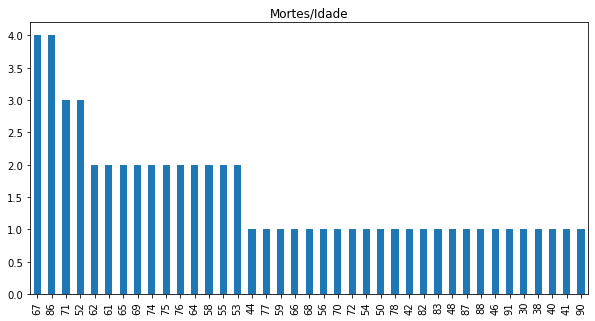

In [18]:
base['Idade'].value_counts().plot(kind='bar',figsize = (10,5), title='Mortes/Idade')

# 13. Caculando log para cálculo para simulação

In [19]:
log_obitos = np.log(1 + base['Obitos'].pct_change())

In [20]:
base['Obitos'].tail()

55    56
56    57
57    51
58    52
59    53
Name: Obitos, dtype: int64

# 14. Gráfico com log para cálculo da simulção

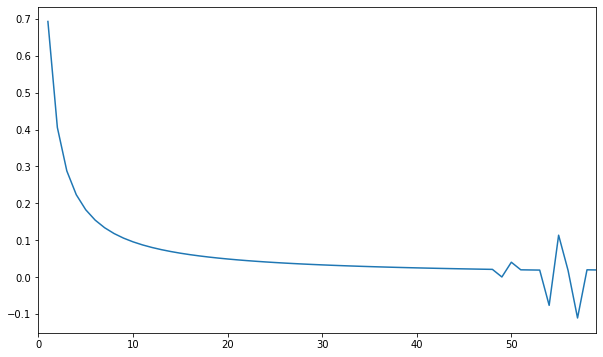

In [21]:
log_obitos.plot(figsize=(10,6))

In [22]:
u = log_obitos.mean()
u

0.06729308328054441

In [23]:
var = log_obitos.var()
var

0.012491180958827843

In [24]:
drift = u - (0.5 * var)
drift

0.06104749280113049

In [25]:
stdev = log_obitos.std()
stdev

0.11176395196496876

In [26]:
type(drift)

float

In [27]:
type(stdev)

float

In [28]:
np.array(drift)

array(0.06104749)

In [29]:
drift

0.06104749280113049

In [30]:
stdev

0.11176395196496876

In [31]:
norm.ppf(0.95)

1.6448536269514722

In [32]:
x = np.random.rand(10,2)
x

array([[0.59411899, 0.47984864],
       [0.63018759, 0.80889915],
       [0.85267425, 0.78250425],
       [0.79056954, 0.85841624],
       [0.97094784, 0.37674509],
       [0.43842018, 0.50625629],
       [0.41948235, 0.35256818],
       [0.31890256, 0.6312057 ],
       [0.29477146, 0.45365469],
       [0.80435084, 0.62444362]])

In [33]:
norm.ppf(x)

array([[ 0.23815353, -0.05053347],
       [ 0.33235022,  0.87384676],
       [ 1.04797204,  0.78067867],
       [ 0.808399  ,  1.07323091],
       [ 1.89491007, -0.31404063],
       [-0.15497586,  0.01568285],
       [-0.20321793, -0.3783961 ],
       [-0.47076981,  0.33504836],
       [-0.53949852, -0.116433  ],
       [ 0.85726523,  0.31717245]])

In [34]:
z= norm.ppf(np.random.rand(10,4))
z

array([[ 4.24659724e-01, -1.15243987e+00, -9.95419382e-01,
        -4.14503701e-01],
       [ 4.89917317e-01,  8.24777597e-02, -7.79068032e-01,
        -8.01929789e-01],
       [ 1.73796452e+00,  6.44310595e-01,  5.67169156e-01,
         9.29230438e-01],
       [ 1.20228214e+00,  2.39448512e-03, -1.26337584e+00,
        -4.86707878e-01],
       [ 5.81691374e-03, -6.23867287e-01,  1.09616303e+00,
        -1.29502694e+00],
       [-1.90234470e-01, -1.91801992e+00, -3.08730556e-01,
        -1.35482013e+00],
       [ 1.98475522e+00, -1.01117805e+00, -6.56508454e-01,
         1.22730229e-01],
       [-3.67381126e-01, -6.34813181e-01,  3.40751891e-01,
         2.79784910e+00],
       [-1.81300933e+00,  2.01170850e+00, -4.67367360e-01,
         4.90988193e-02],
       [-3.49875089e-02,  1.25535131e+00, -8.06093433e-01,
         1.23121144e+00]])

In [35]:
t_intervals = 30
iterations = 10

In [36]:
daily_obitos = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_obitos

array([[1.01665833, 0.87970161, 1.03818072, 1.11394884, 1.12265547,
        0.89739735, 1.2640099 , 1.01472677, 0.99000017, 0.99099174],
       [1.03556775, 1.26029866, 1.0866436 , 1.01803639, 1.22276096,
        0.92835995, 1.11954762, 0.99296373, 1.23722388, 1.04927757],
       [0.89695938, 1.11907349, 1.19318719, 1.07400491, 0.97809219,
        1.23174633, 1.26631498, 1.28084759, 1.1868272 , 1.22855146],
       [1.11189941, 1.07872037, 1.22565073, 1.21421106, 1.01526985,
        1.28579058, 1.09967603, 1.21082295, 1.10943412, 1.20260815],
       [1.08867488, 1.14195141, 1.12483523, 1.08580767, 1.14604616,
        0.93501409, 1.04675482, 1.10179401, 1.30887243, 1.02222249],
       [1.28951786, 0.96698175, 1.30878087, 1.03536551, 1.22449278,
        1.07052315, 1.13398833, 1.13010086, 1.04401478, 0.97034988],
       [1.17027457, 0.99826224, 1.2244165 , 1.26358291, 1.14125661,
        1.03307078, 0.8721585 , 1.10577053, 0.90078714, 1.16872912],
       [0.96902447, 1.09868557, 0.9519853

In [37]:
last_data = base['Obitos'].iloc[-1]
last_data

53

In [38]:
obito_list = np.zeros_like(daily_obitos)
obito_list

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [39]:
obito_list[0] = last_data
obito_list

array([[53., 53., 53., 53., 53., 53., 53., 53., 53., 53.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [40]:
for t in range (1, t_intervals):
    obito_list[t] = obito_list[t-1]* daily_obitos[t]

In [41]:
obito_list

array([[ 53.        ,  53.        ,  53.        ,  53.        ,
         53.        ,  53.        ,  53.        ,  53.        ,
         53.        ,  53.        ],
       [ 54.88509079,  66.79582915,  57.59211077,  53.95592883,
         64.80633113,  49.20307712,  59.33602368,  52.62707791,
         65.57286572,  55.61171112],
       [ 49.22969683,  74.74944139,  68.71816909,  57.94893249,
         63.38656641,  60.60570959,  75.13809583,  67.40726584,
         77.82366048,  68.32184878],
       [ 54.73847072,  80.63374507,  84.22447429,  70.36223491,
         64.35446949,  77.92625059,  82.62756313,  81.61826463,
         86.34022438,  82.16441215],
       [ 59.59239826,  92.07981894,  94.7386559 ,  76.39985459,
         73.75319234,  72.86214263,  86.49080002,  89.92651515,
        113.00833962,  83.99031037],
       [ 76.84546186,  89.03950486, 123.99214061,  79.10177468,
         90.31025141,  78.00061047,  98.07955748, 101.62603236,
        117.98237717,  81.49998773],
       [ 8

In [42]:
obito_list.min()

49.20307712452645

In [43]:
obito_list.max()

839.9940823686102

In [44]:
obito_list.mean()

196.99243116058267

In [45]:
obito_list.std()

143.98034870785196

In [46]:
np.median(obito_list)

148.7462033885073

# 15. Simulação de Monte Carlo para os óbitos em Indaiatuba

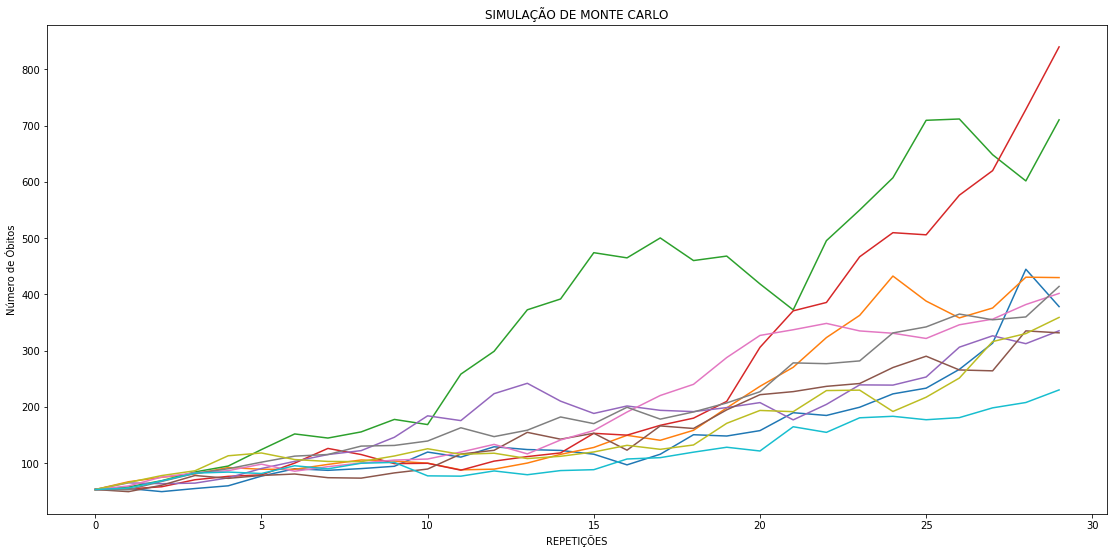

In [47]:
plt.figure(figsize=(19,9))
plt.plot(obito_list);
plt.title('SIMULAÇÃO DE MONTE CARLO');
plt.xlabel('REPETIÇÕES'); #definindo nome do eixo X
plt.ylabel('Número de Óbitos'); #definindo nome do eixo Y


In [48]:
print(f'Óbitos mínimos, {obito_list.min():.0f}'' pessoas')
print(f'Óbitos mediana, {np.median(obito_list):.0f}'' pessoas')
print(f'Óbitos médio, {obito_list.mean():.0f}'' pessoas')
print(f'Óbitos máximo, {obito_list.max():.0f}'' pessoas')
print('Óbitos atual,',(str(round(base['Obitos'].iloc[-1]))),'pessoas') #informar o ticker

Óbitos mínimos, 49 pessoas
Óbitos mediana, 149 pessoas
Óbitos médio, 197 pessoas
Óbitos máximo, 840 pessoas
Óbitos atual, 53 pessoas


# 16. Cálculo de mortes por dia

In [49]:
diferencaDias = base['diferencaDias'] = base['Data'] - base['Data'].min()
diferencaDias.tail()

55   85 days
56   85 days
57   86 days
58   87 days
59   88 days
Name: Data, dtype: timedelta64[ns]

In [50]:
last_data

53

In [65]:
d = a.loc[59:].astype('timedelta64[D]') #atualizar com índice da última data = last_data

In [66]:
d

59    88.0
Name: Data, dtype: float64

In [67]:
ObitosDia = last_data/d
ObitosDia

59    0.602273
Name: Data, dtype: float64

# Principais Conclusões

1 A cada dois dias uma pessoa vem a óbito

2 Predominância do sexo masculino

3 O viés é ascendente